In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Đọc file,gộp file

In [2]:
data = pd.read_excel('Dong Bac Bo.xlsx',sheet_name=None)
dataFrames={}
dfs = []
for sheet_name, sheet_data in data.items():
  df = pd.DataFrame(sheet_data)
  dfs.append(df)
  dataFrames[sheet_name] = df
combined_df = pd.concat(dfs)
f1 = dataFrames['Ha_Giang']
f2 = dataFrames['Cao_Bang']
f3 = dataFrames['Lang_Son']
f4 = dataFrames['Tuyen_Quang']
f5 = dataFrames['Bac_Kan']
f6 = dataFrames['Thai_Nguyen']
f7 = dataFrames['Yen_Bai']
f8 = dataFrames['Phu_Tho']
f9 = dataFrames['Bac_Giang']
f10 = dataFrames['Quang_Ninh']

In [3]:
average_df = pd.DataFrame()
average_df['Day'] = (f1['Day'])
average_df['TempeMax'] = (f1['Temperature Max'] + f2['Temperature Max'] + f3['Temperature Max'] + f4['Temperature Max'] + f5['Temperature Max'] +
                         f6['Temperature Max'] + f7['Temperature Max'] + f8['Temperature Max'] + f9['Temperature Max'] + f10['Temperature Max']) / 10
average_df['TempMin'] = (f1['Temperature Min'] + f2['Temperature Min'] + f3['Temperature Min'] + f4['Temperature Min'] + f5['Temperature Min'] +
                         f6['Temperature Min'] + f7['Temperature Min'] + f8['Temperature Min'] + f9['Temperature Min'] + f10['Temperature Min']) / 10
average_df['TempAvg'] = (f1['Temperature Avg'] + f2['Temperature Avg'] + f3['Temperature Avg'] + f4['Temperature Avg'] + f5['Temperature Avg'] +
                         f6['Temperature Avg'] + f7['Temperature Avg'] + f8['Temperature Avg'] + f9['Temperature Avg'] + f10['Temperature Avg']) / 10
average_df['MaxWind_km/h'] = (f1['MaxWind_km/h'] + f2['MaxWind_km/h'] + f3['MaxWind_km/h'] + f4['MaxWind_km/h'] +
                              f5['MaxWind_km/h'] + f6['MaxWind_km/h'] + f7['MaxWind_km/h'] + f8['MaxWind_km/h'] +
                              f9['MaxWind_km/h'] + f10['MaxWind_km/h']) / 10
average_df['TotalPrecip_mm'] = (f1['TotalPrecip_mm'] + f2['TotalPrecip_mm'] + f3['TotalPrecip_mm'] +
                                f4['TotalPrecip_mm'] + f5['TotalPrecip_mm'] + f6['TotalPrecip_mm'] +
                                f7['TotalPrecip_mm'] + f8['TotalPrecip_mm'] + f9['TotalPrecip_mm'] +
                                f10['TotalPrecip_mm']) / 10
average_df['AvgHumidity'] = (f1['Humidity Avg'] + f2['Humidity Avg'] + f3['Humidity Avg'] + f4['Humidity Avg'] +
                             f5['Humidity Avg'] + f6['Humidity Avg'] + f7['Humidity Avg'] + f8['Humidity Avg'] +
                             f9['Humidity Avg'] + f10['Humidity Avg']) / 10
average_df

,Day,TempeMax,TempMin,TempAvg,MaxWind_km/h,TotalPrecip_mm,AvgHumidity
0,2022-06-29,31.94,25.51,27.98,10.74,8.114,78.0
1,2022-06-30,29.16,24.26,26.17,7.67,14.780,85.6
2,2022-07-01,30.49,23.56,26.65,8.26,8.380,82.7
3,2022-07-02,32.68,24.45,28.06,13.81,9.820,76.5
4,2022-07-03,30.77,25.05,27.47,14.95,6.831,82.8
...,...,...,...,...,...,...,...
362,2023-06-26,28.77,22.44,24.89,10.55,12.780,88.0
363,2023-06-27,29.85,23.15,25.97,14.19,10.300,85.8
364,2023-06-28,31.68,23.88,27.12,17.42,7.560,83.0
365,2023-06-29,32.29,24.28,27.77,17.33,5.120,80.9


##Phân tích trên data trung bình 10 tháng

+ Phan Tich du lieu cua 1 vung

In [4]:
average_df.isnull().sum()

Day               0
TempeMax          0
TempMin           0
TempAvg           0
MaxWind_km/h      0
TotalPrecip_mm    0
AvgHumidity       0
dtype: int64

+ Ta thấy tập dữ liệu vô cùng sạch với 366 dòng khong hề chưa giá trị NULL nào

In [5]:
average_df.dtypes

Day                object
TempeMax          float64
TempMin           float64
TempAvg           float64
MaxWind_km/h      float64
TotalPrecip_mm    float64
AvgHumidity       float64
dtype: object

+ Ta thấy kiểu day đang là object mà kiểu của ngày là date vậy định dạng đang sai nên ta chuyển lại kiểu của day vè date

In [6]:
average_df["Day"] = pd.to_datetime(average_df["Day"])

In [7]:
#kiểm tra lại
average_df.dtypes

Day               datetime64[ns]
TempeMax                 float64
TempMin                  float64
TempAvg                  float64
MaxWind_km/h             float64
TotalPrecip_mm           float64
AvgHumidity              float64
dtype: object

## Vẽ đồ thị nhận xét mô hình

In [8]:
# # Tạo cột "Month" để lưu giữ thông tin về tháng của mỗi ngày
# average_df["Month"] = average_df["Day"].dt.month
# # Gom nhóm dữ liệu theo cột "Month" và tính trung bình của cột "TempeMax" cho mỗi nhóm
# average_temp_by_month = average_df.groupby("Month")["TempeMax"].mean()
# average_temp_by_month.plot(kind="bar")
# plt.xlabel("Month")
# plt.ylabel("Nhiệt độ trung bình tối đa")
# plt.title("Nhiệt độ Max trung bình theo tháng")
# plt.xticks(range(0, 13))
# plt.show()

<ipython-input-9-632fa5a3ece4>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_by_month = average_df.groupby("Month").mean()


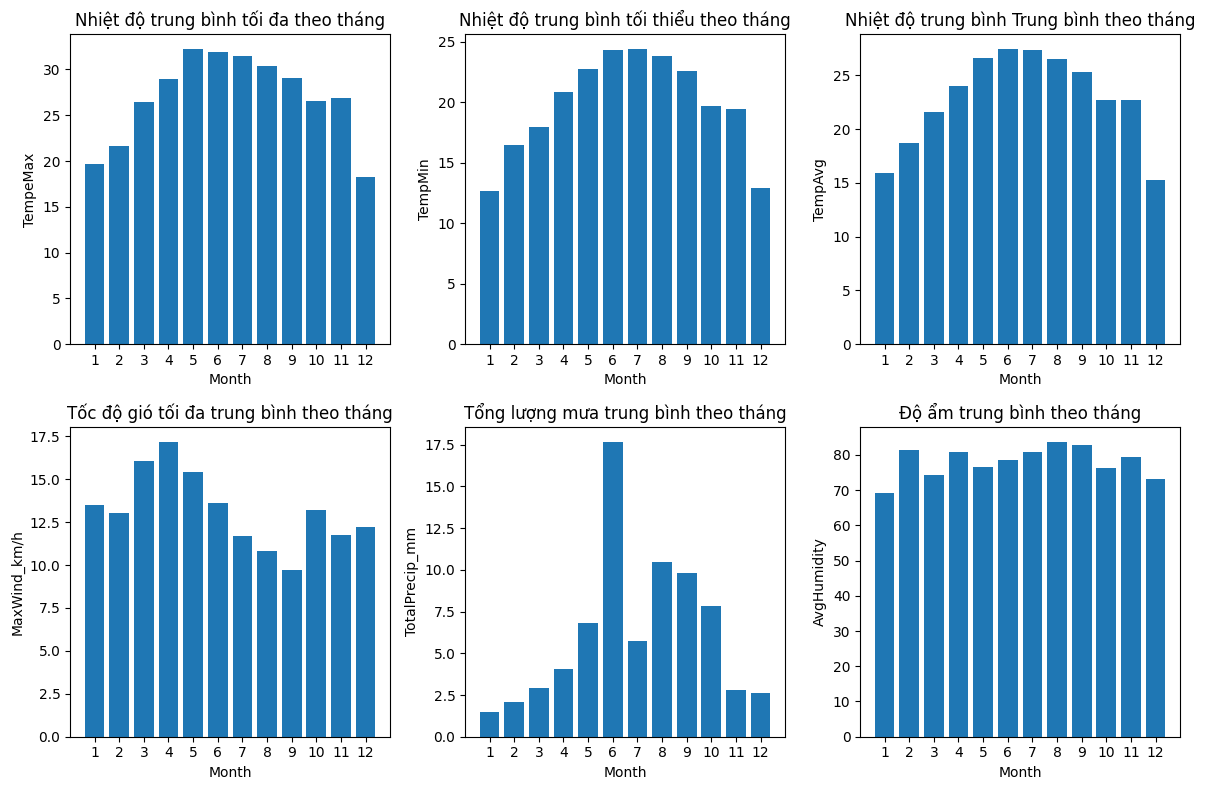

In [9]:
import matplotlib.pyplot as plt

# Tạo cột "Month" để lưu giữ thông tin về tháng của mỗi ngày
average_df["Month"] = average_df["Day"].dt.month

# Gom nhóm dữ liệu theo cột "Month" và tính trung bình của các thuộc tính cho mỗi nhóm
average_by_month = average_df.groupby("Month").mean()

# Tạo lưới 2x3 cho 6 biểu đồ
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Vẽ biểu đồ cho từng thuộc tính
axes[0, 0].bar(average_by_month.index, average_by_month["TempeMax"])
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("TempeMax")
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_title("Nhiệt độ trung bình tối đa theo tháng")

axes[0, 1].bar(average_by_month.index, average_by_month["TempMin"])
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("TempMin")
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_title("Nhiệt độ trung bình tối thiểu theo tháng")

axes[0, 2].bar(average_by_month.index, average_by_month["TempAvg"])
axes[0, 2].set_xlabel("Month")
axes[0, 2].set_ylabel("TempAvg")
axes[0, 2].set_xticks(range(1, 13))
axes[0, 2].set_title("Nhiệt độ trung bình Trung bình theo tháng")

axes[1, 0].bar(average_by_month.index, average_by_month["MaxWind_km/h"])
axes[1, 0].set_xlabel("Month")
axes[1, 0].set_ylabel("MaxWind_km/h")
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_title("Tốc độ gió tối đa trung bình theo tháng")

axes[1, 1].bar(average_by_month.index, average_by_month["TotalPrecip_mm"])
axes[1, 1].set_xlabel("Month")
axes[1, 1].set_ylabel("TotalPrecip_mm")
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_title("Tổng lượng mưa trung bình theo tháng")

axes[1, 2].bar(average_by_month.index, average_by_month["AvgHumidity"])
axes[1, 2].set_xlabel("Month")
axes[1, 2].set_ylabel("AvgHumidity")
axes[1, 2].set_xticks(range(1, 13))
axes[1, 2].set_title("Độ ẩm trung bình theo tháng")

# Căn chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [10]:
average_df = average_df.set_index('Day')
average_df = average_df.groupby(pd.Grouper(freq='M')).mean()
average_df

,TempeMax,TempMin,TempAvg,MaxWind_km/h,TotalPrecip_mm,AvgHumidity,Month
Day,,,,,,,
2022-06-30,30.550000,24.885000,27.075000,9.205000,11.447000,81.800000,6.0
2022-07-31,31.441935,24.403226,27.361290,11.694839,5.755839,80.838710,7.0
2022-08-31,30.396452,23.846129,26.553871,10.836774,10.443065,83.729032,8.0
2022-09-30,29.104333,22.617000,25.347333,9.706000,9.787800,82.746667,9.0
2022-10-31,26.552581,19.698065,22.680968,13.228387,7.824516,76.361290,10.0
2022-11-30,26.854000,19.471000,22.680333,11.763000,2.797667,79.423333,11.0
2022-12-31,18.207742,12.907419,15.304194,12.208387,2.623548,73.093548,12.0
2023-01-31,19.713548,12.680645,15.901290,13.519355,1.467419,69.129032,1.0
2023-02-28,21.627857,16.502143,18.721071,13.016071,2.071286,81.267857,2.0


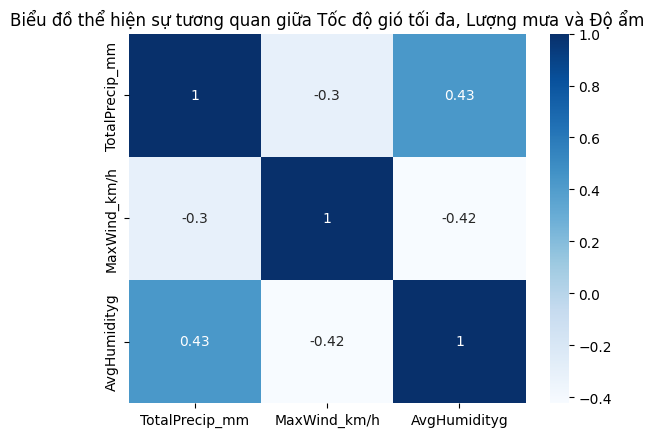

In [11]:
data = {'TotalPrecip_mm': average_df['TotalPrecip_mm'],
        'MaxWind_km/h': average_df['MaxWind_km/h'],
        'AvgHumidityg': average_df['AvgHumidity']}
df = pd.DataFrame(data)
# Tính ma trận hệ số tương quan
corr_matrix = df.corr()
# Vẽ biểu đồ hệ số tương quan
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Biểu đồ thể hiện sự tương quan giữa Tốc độ gió tối đa, Lượng mưa và Độ ẩm")
plt.savefig('Biểu đồ thể hiện sự tương quan giữa Tốc độ gió tối đa, Lượng mưa và Độ ẩm', dpi=300, bbox_inches='tight')
plt.show()

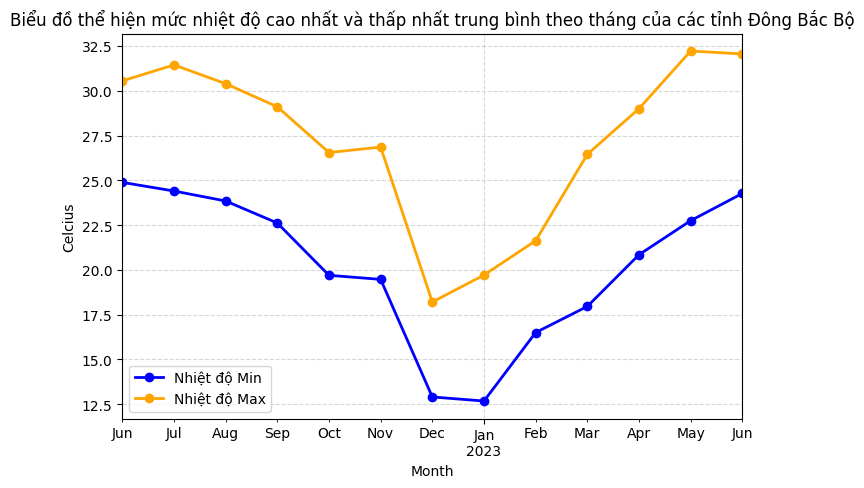

In [12]:
plt.figure(figsize=(8,5))
average_df.groupby('Day')['TempMin'].mean().plot(label='Nhiệt độ Min', color='blue', marker='o', linestyle='-', linewidth=2)
average_df.groupby('Day')['TempeMax'].mean().plot(label='Nhiệt độ Max', color='orange', marker='o', linestyle='-', linewidth=2)

plt.title('Biểu đồ thể hiện mức nhiệt độ cao nhất và thấp nhất trung bình theo tháng của các tỉnh Đông Bắc Bộ')
plt.savefig('Biểu đồ thể hiện mức nhiệt độ cao nhất và thấp nhất trung bình theo tháng của các tỉnh Đông Bắc Bộ', dpi=350, bbox_inches='tight')
plt.xlabel('Month')
plt.ylabel('Celcius')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Nhận xét:**
- Nhiệt độ thấp nhất rơi vào khoảng tháng 12 và tháng 1. Đây chính là khoảng thời gian mùa Đông ở miền Bắc. Tuy nhiên nhiệt độ thấp nhất ở đây không chỉ dừng ở đó, mà những tỉnh ở vùng núi Tây Bắc Bộ như là Sơn La, Lai Châu có những thời điểm năm đó rét đậm rét hại nhiệt độ thấp nhất còn có thể dưới âm độ C, nhưng ở đây do ta đã lấy trung bình nên là nhiệt độ thấp nhất chung cho toàn miền Bắc sẽ là như khoảng trên.
- Biểu đồ cho thấy sự biến đổi nhiệt độ theo các tháng trong năm. Có sự chênh lệch rõ rệt giữa nhiệt độ cao nhất và thấp nhất trong mùa Đông (tháng 12 - tháng 1) và mùa Hè (tháng 5-tháng 6 - tháng 7). Điều này cho thấy miền Bắc có mùa đông lạnh và mùa hè nóng, với sự chênh lệch nhiệt độ lớn giữa các mùa.
- Có sự khác biệt về nhiệt độ giữa các tỉnh. Các tỉnh ở vùng núi Tây Bắc Bộ như Sơn La, Lai Châu có nhiệt độ thấp hơn so với các tỉnh Đồng bằng sông Hồng. Điều này có lẽ liên quan đến độ cao của khu vực, vì các tỉnh núi cao sẽ có nhiệt độ thấp hơn do tác động của địa hình nói cao.

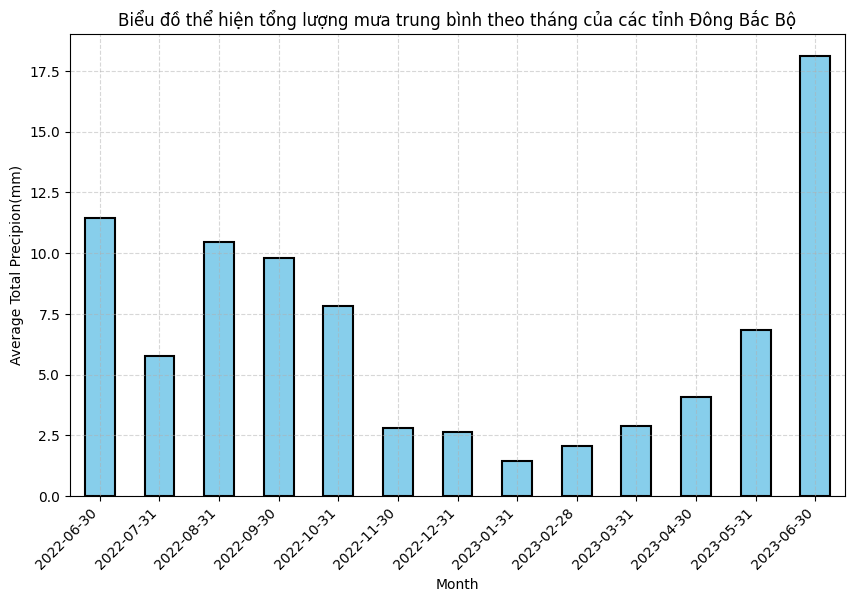

In [13]:
plt.figure(figsize=(10, 6))
average_df.groupby('Day')['TotalPrecip_mm'].mean().plot.bar(color='skyblue', edgecolor='black', linewidth=1.5)
plt.xlabel('Month')
plt.ylabel('Average Total Precipion(mm)')
plt.title('Biểu đồ thể hiện tổng lượng mưa trung bình theo tháng của các tỉnh Đông Bắc Bộ')
# plt.savefig('Biểu đồ thể hiện tổng lượng mưa trung bình theo tháng của các tỉnh Đông Bắc Bộ')
plt.savefig('Biểu đồ thể hiện tổng lượng mưa trung bình theo tháng của các tỉnh Đông Bắc Bộ', dpi=300, bbox_inches='tight',)
plt.grid(True, linestyle='--', alpha=0.5)
xticks_loc = np.arange(len(average_df.index))
xticks_label = average_df.index.strftime("%Y-%m-%d")
plt.xticks(xticks_loc, xticks_label, rotation=45, ha='right')
plt.show()

**Nhận xét:**
- Tháng 6/2022, 8/2022 ,9/2022  và 6/2023 là 3 tháng có lượng mưa lớn nhất trong tập quan sát thu thập giai đoạn từ 29/02/2022 - 30/06/2023.
- Mùa mưa ở miền Bắc thường diễn ra vào khoảng từ Tháng 6 - Tháng 9 tuy vẫn có nhưng số lượng sẽ ít hơn, vì lúc này thời tiết đang là mùa Thu và sắp chuyển giao sang mùa Đông.Tháng 5 vẫn có một lượng mưa nhất định vì bắt đầu vào mùa mưa nhưng không qua nhiều
- Từ các Tháng 11 - Tháng 4 do là thời tiết lạnh, hanh khô và đã là mùa đông lên lượng mưa giảm.

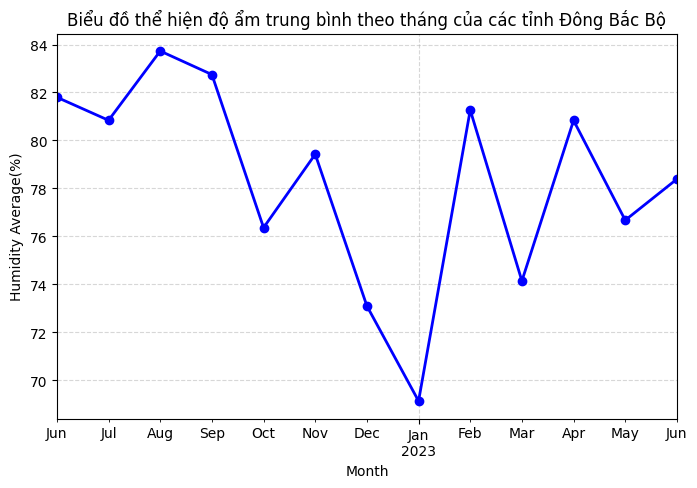

In [14]:
plt.figure(figsize=(8, 5))
average_df.groupby('Day')['AvgHumidity'].mean().plot(color='blue', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Humidity Average(%)')
plt.title('Biểu đồ thể hiện độ ẩm trung bình theo tháng của các tỉnh Đông Bắc Bộ')
plt.savefig('Biểu đồ thể hiện độ ẩm trung bình theo tháng của các tỉnh Đông Bắc Bộ', dpi=300, bbox_inches='tight')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

+ Với đồ thì <Nhiệt độ trung bình tối đa theo tháng> ta thấy nhiệt độ max trung bình của 10 tỉnh

Tháng 8 và 9 thường là thời điểm có độ ẩm lớn nhất trong năm, tuy nhiên, trong khu vực Đông Bắc Bộ, không xảy ra hiện tượng nồm ẩm như trong khoảng thời gian từ tháng Giêng đến tháng 4. Lý giải cho hiện tượng này có thể được giải thích như sau:

Chuyển từ Hè sang Thu: Trong khoảng thời gian này, nhiệt độ vẫn cao, nhưng không quá gay gắt như trong tháng 5 và 6. Mặt khác, không khí cũng không quá lạnh. Do đó, hơi nước không có đủ khả năng tồn tại trong không khí dưới dạng nước và không gây ra hiện tượng nồm ẩm.

Mùa Đông: Trái ngược với tháng 8 và 9, mùa đông có nhiệt độ thấp, lạnh và hanh khô. Khi nhiệt độ giảm, khả năng của không khí để chứa hơi nước cũng giảm đi. Điều này dẫn đến độ ẩm thấp hơn trong không khí. Ngoài ra, mùa đông ít mưa hoặc không có mưa, làm giảm nguồn cung cấp hơi nước từ nguồn nước như sông, hồ và đất, cũng đóng góp vào độ ẩm thấp trong không khí.

Gió lạnh và khô: Mùa đông thường có sự hiện diện của gió lạnh và khô. Gió lạnh từ các vùng cận nhiệt đới thổi vào khu vực, mang theo không khí khô và không chứa nhiều hơi nước. Điều này làm tăng sự bay hơi và làm giảm độ ẩm trong không khí.

Chuyển giao từ mùa Đông sang mùa Xuân (tháng 2 - 4): Trong giai đoạn này, sự không ổn định của khí hậu và sự giao thoa giữa không khí lạnh từ phía Bắc và không khí ấm từ phía Nam có thể tạo ra độ ẩm cao trong không khí và góp phần vào hiện tượng nồm ẩm. Các luồng gió từ các vùng biển và sông lớn cũng có thể mang theo hơi nước, tăng thêm độ ẩm không khí.

In [15]:
# trung bình
average = average_df.mean()
print("Trung bình:")
print(average)

Trung bình:
TempeMax          27.244112
TempMin           20.217975
TempAvg           23.178081
MaxWind_km/h      12.902394
TotalPrecip_mm     6.625008
AvgHumidity       78.339934
Month              6.461538
dtype: float64


In [16]:
# Độ lệch chuẩn
std_df = average_df.std()
print("\nĐộ lệch chuẩn:")
print(std_df)


Độ lệch chuẩn:
TempeMax          4.691125
TempMin           4.197142
TempAvg           4.255807
MaxWind_km/h      2.372222
TotalPrecip_mm    4.831607
AvgHumidity       4.275505
Month             3.454837
dtype: float64


In [17]:
# Tính phương sai
var_df = average_df.var()
print("\nPhương sai:")
print(var_df)


Phương sai:
TempeMax          22.006656
TempMin           17.616002
TempAvg           18.111889
MaxWind_km/h       5.627435
TotalPrecip_mm    23.344429
AvgHumidity       18.279947
Month             11.935897
dtype: float64


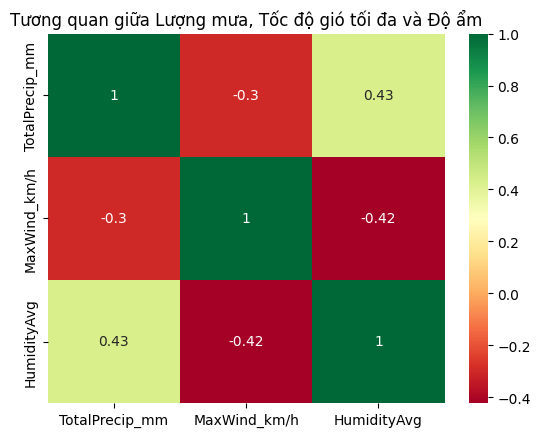

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame từ tập dữ liệu
data = {'TotalPrecip_mm': average_df['TotalPrecip_mm'],
    'MaxWind_km/h': average_df['MaxWind_km/h'],
    'HumidityAvg': average_df['AvgHumidity'] }
df = pd.DataFrame(data)
corr_matrix = df.corr()
# biểu đồ tương quan
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")
plt.title("Tương quan giữa Lượng mưa, Tốc độ gió tối đa và Độ ẩm")
plt.show()

+ Các giá trị trong biểu đồ thể hiện mức độ tương quan giữa các cặp biến. Một giá trị càng gần 1 (gần màu xanh dương) cho thấy mối tương quan dương mạnh, tức là khi một biến tăng, biến kia cũng tăng. Ngược lại, một giá trị càng gần -1 (gần màu đỏ) cho thấy mối tương quan âm mạnh,
tức là khi một biến tăng, biến kia giảm. Giá trị gần 0 (gần màu trắng) cho thấy mối tương quan yếu hoặc không có tương quan.
  + TotalPrecip_mm' (lượng mưa tổng cộng) và 'HumidityAvg' (độ ẩm trung bình) có mối tương quan dương mạnh. Điều này có nghĩa là khi lượng mưa tăng, độ ẩm cũng tăng.
  + 'MaxWind_km/h' (tốc độ gió tối đa) không có tương quan mạnh với 'TotalPrecip_mm' (lượng mưa tổng cộng) hoặc 'HumidityAvg' (độ ẩm trung bình). Điều này cho thấy không có mối liên hệ rõ ràng giữa tốc độ gió tối đa và lượng mưa hoặc độ ẩm.

#Phân tích trên tập data tổng vùng

In [19]:
combined_df

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
0,2022-06-29,23.7,18.3,20.5,11.2,13.3,90,Moderate or heavy rain shower,5
1,2022-06-30,23.5,17.7,20.2,7.9,8.9,89,Heavy rain at times,5
2,2022-07-01,23.4,17.5,20.2,8.3,7.0,91,Patchy rain possible,5
3,2022-07-02,26.1,17.4,21.7,9.7,6.8,84,Patchy rain possible,6
4,2022-07-03,26.7,17.9,21.9,15.2,4.7,84,Moderate or heavy rain shower,6
...,...,...,...,...,...,...,...,...,...
362,2023-06-26,32.1,25.4,28.3,11.9,2.8,76,Light rain shower,7
363,2023-06-27,31.8,26.4,28.4,14.4,8.9,78,Light rain shower,7
364,2023-06-28,32.6,26.3,28.5,19.8,14.5,80,Patchy light rain with thunder,7
365,2023-06-29,34.0,26.7,29.7,22.0,1.0,72,Thundery outbreaks possible,7


In [20]:
# Đếm số lượng mỗi loại comment
comment_counts = combined_df['Comment'].value_counts()
comment_counts

Patchy rain possible              848
Moderate or heavy rain shower     569
Overcast                          466
Light rain shower                 371
Partly cloudy                     308
Moderate rain at times            258
Sunny                             250
Cloudy                            189
Heavy rain at times               129
Thundery outbreaks possible        69
Patchy light rain with thunder     58
Light drizzle                      41
Mist                               30
Light rain                         28
Torrential rain shower             27
Fog                                14
Moderate rain                       5
Patchy light drizzle                4
Patchy light rain                   3
Heavy rain                          3
Name: Comment, dtype: int64

## Nhận Xét
+ "Patchy rain possible" có số lượng comment cao nhất, đạt 848 comment. Điều này cho thấy về khả năng có mưa rải rác là lớn nhất.

+ "Moderate or heavy rain shower" và "Overcast" cũng xảy ra nhiều với 569 và 466 comment tương ứng. Điều này cho thấy thông tin về khả năng mưa vừa hoặc mưa nặng cũng như tình trạng trời nhiều mây.

+ "Light rain shower", "Partly cloudy", "Moderate rain at times", và "Sunny" cũng có với số lượng comment từ 250 đến 371. Điều này cho thấy thông tin về khả năng có mưa nhẹ, trời phần nhiều mây, mưa vừa lúc và trời nắng.

+ Các loại thời tiết khác như "Cloudy", "Heavy rain at times", "Thundery outbreaks possible", "Patchy light rain with thunder", "Light drizzle", "Mist", "Light rain", "Torrential rain shower", "Fog", "Moderate rain", "Patchy light drizzle", "Patchy light rain" và "Heavy rain" cũng nhận được một số lượng comment, tuy nhiên số lượng này thấp hơn so với nhóm trên.

Tổng quan, các loại thời tiết như mưa rải rác, mưa vừa hoặc mưa nặng, và tình trạng trời nhiều mây thu hút sự quan tâm lớn của người dùng trong các bình luận về thời tiết.

In [21]:
f1

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
0,2022-06-29,23.7,18.3,20.5,11.2,13.3,90,Moderate or heavy rain shower,5
1,2022-06-30,23.5,17.7,20.2,7.9,8.9,89,Heavy rain at times,5
2,2022-07-01,23.4,17.5,20.2,8.3,7.0,91,Patchy rain possible,5
3,2022-07-02,26.1,17.4,21.7,9.7,6.8,84,Patchy rain possible,6
4,2022-07-03,26.7,17.9,21.9,15.2,4.7,84,Moderate or heavy rain shower,6
...,...,...,...,...,...,...,...,...,...
362,2023-06-26,25.3,16.6,19.9,11.5,4.8,86,Light rain shower,6
363,2023-06-27,26.6,17.3,20.6,16.9,3.9,87,Patchy rain possible,6
364,2023-06-28,29.8,18.2,22.2,19.4,1.0,83,Patchy rain possible,6
365,2023-06-29,27.6,19.0,22.5,18.7,0.6,83,Patchy rain possible,6


In [22]:
# Đếm số lượng mỗi loại comment
comment_counts = f1['Comment'].value_counts()
comment_counts

Patchy rain possible              116
Moderate or heavy rain shower      42
Partly cloudy                      41
Overcast                           39
Sunny                              27
Cloudy                             21
Light rain shower                  19
Moderate rain at times             19
Mist                               10
Heavy rain at times                 9
Patchy light rain with thunder      7
Fog                                 5
Thundery outbreaks possible         4
Moderate rain                       2
Light rain                          1
Light drizzle                       1
Patchy light drizzle                1
Patchy light rain                   1
Heavy rain                          1
Torrential rain shower              1
Name: Comment, dtype: int64

## Nhận Xét mưa 1 tỉnh
+ "Patchy rain possible" có số lượng comment cao nhất, đạt 116 comment. Điều này cho thấy thông tin về khả năng có mưa rải rác vẫn lớn nhất.

+ "Moderate or heavy rain shower" và "Partly cloudy" cũng có số lượng comment khá đáng kể, lần lượt là 42 và 41 comment. Điều này cho thấy có thể mưa vừa hoặc mưa nặng cũng như tình trạng trời phần nhiều mây.

+ "Overcast", "Sunny", "Cloudy", "Light rain shower" và "Moderate rain at times" cũng nhận được một số lượng comment từ 19 đến 39. Điều này cho thấy  tình trạng trời nhiều mây, trời nắng, trời có mây, mưa nhẹ và mưa vừa cũng có thể xảy ra.

+ Các loại thời tiết khác như "Mist", "Heavy rain at times", "Patchy light rain with thunder", "Fog", "Thundery outbreaks possible", "Moderate rain", "Light rain", "Light drizzle", "Patchy light drizzle", "Patchy light rain", "Heavy rain" và "Torrential rain shower" cũng nhận được một số lượng comment nhưng ít hơn so với nhóm trên.

Tổng quan, các loại thời tiết như mưa rải rác, mưa vừa hoặc mưa nặng, tình trạng trời phần nhiều mây, trời nắng và mưa nhẹ là chiếm phần lớn trong comment về thời tiết.

##Kết luận
+ có thể thấy thởi tiết thường là mưa . Điều này cho thấy thời tiêt mưa vừa hoặc mưa nặng cũng như tình trạng trời nhiều mây là phổ biết nhiều nhất luôn chiếm phần lớn

# Phân tích 1 trong những tỉnh quan trọng nhất tây bắc bộ

## Yên Bái

+ Trong số các tỉnh này, Yên bái là môt tỉnh có nền kinh tế chủ yếu dự vào ngành nông nghiệp.Nổi tiếng với đất canh tác rộng lớn vì vậy việc phân tích khi hậu ở tỉnh này giúp ta năm được khí hậu thời tiết thích hợp để nuôi trồng

In [23]:
f7

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
0,2022-06-29,34.1,25.9,29.5,10.8,8.12,75,Moderate or heavy rain shower,7
1,2022-06-30,29.2,25.1,26.6,8.3,30.00,87,Moderate or heavy rain shower,6
2,2022-07-01,32.3,24.4,28.3,6.8,8.40,78,Moderate or heavy rain shower,7
3,2022-07-02,35.7,26.0,30.7,13.0,0.40,72,Patchy rain possible,8
4,2022-07-03,34.0,25.8,29.2,13.7,4.10,83,Patchy rain possible,7
...,...,...,...,...,...,...,...,...,...
362,2023-06-26,29.9,23.5,25.9,11.2,25.30,90,Moderate or heavy rain shower,6
363,2023-06-27,31.6,24.6,27.6,14.8,9.50,84,Moderate or heavy rain shower,7
364,2023-06-28,33.4,25.2,29.0,18.0,7.30,80,Patchy light rain with thunder,7
365,2023-06-29,35.4,25.3,29.7,18.0,7.50,79,Light rain shower,8


In [24]:
f7.describe()

,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,UV Index
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,28.670572,21.099728,24.343052,12.630518,6.017411,75.223433,6.365123
std,6.219725,4.187690,4.659716,4.775724,13.288482,12.107181,1.333750
min,12.900000,9.700000,12.500000,3.800000,0.000000,27.000000,3.000000
25%,23.450000,18.250000,20.900000,9.000000,0.000000,68.500000,5.000000
50%,29.500000,22.500000,25.200000,11.900000,1.000000,78.000000,6.000000
75%,33.000000,24.500000,28.000000,15.500000,5.150000,83.000000,7.000000
max,43.700000,27.300000,33.400000,36.400000,107.600000,96.000000,10.000000


In [25]:
f7.isnull().sum()

Day                0
Temperature Max    0
Temperature Min    0
Temperature Avg    0
MaxWind_km/h       0
TotalPrecip_mm     0
Humidity Avg       0
Comment            0
UV Index           0
dtype: int64

In [26]:
f7.info

<bound method DataFrame.info of             Day  Temperature Max  Temperature Min  Temperature Avg  \
0    2022-06-29             34.1             25.9             29.5   
1    2022-06-30             29.2             25.1             26.6   
2    2022-07-01             32.3             24.4             28.3   
3    2022-07-02             35.7             26.0             30.7   
4    2022-07-03             34.0             25.8             29.2   
..          ...              ...              ...              ...   
362  2023-06-26             29.9             23.5             25.9   
363  2023-06-27             31.6             24.6             27.6   
364  2023-06-28             33.4             25.2             29.0   
365  2023-06-29             35.4             25.3             29.7   
366  2023-06-30             36.3             26.2             30.6   

     MaxWind_km/h  TotalPrecip_mm  Humidity Avg  \
0            10.8            8.12            75   
1             8.3        

In [27]:
f5.dtypes

Day                 object
Temperature Max    float64
Temperature Min    float64
Temperature Avg    float64
MaxWind_km/h       float64
TotalPrecip_mm     float64
Humidity Avg         int64
Comment             object
UV Index             int64
dtype: object

+ Thông qua bảng data đại diện của Sơn La, thì ta có thể rút ra nhận xét, mỗi bảng dữ liệu đều gồm có 367 dòng (thời gian từ 29/06/2022 - 30/06/2023) và 9 cột thuộc tính gồm (2 biến định tính và 7 biến định lượng)
+ Kiểu dữ liệu cột Date ở đây đang lưu chưa đúng kiểu dữ liệu => Chỉnh sửa
+ Ý nghĩa của các thuộc tính:
+ Day: Ngày quan sát lấy dữ liệu
+ Temperature Max: Nhiệt độ cao nhất(độ C) trong ngày đó.
+ Temperature Min: Nhiệt độ thấp nhất(độ C) trong ngày đó.
+ Temperature Avg: Nhiệt độ trung bình(độ C) trong ngày đó.
+ MaxWind_km/h: Sức(Tốc độ) gió lớn nhất(km/h) trong ngày đó.
+ TotalPrecip_mm: Tổng lượng mưa(mm) trong ngày đó.
+ Humidity Avg: Độ ẩm trung bình(%) trong ngày đó.
+ Comment: Các ghi chú hoặc thông tin dự báo khác về ngày đó.
+ UV Index: Chỉ số tia tử ngoại trong ngày đó.

In [28]:
#chỉnh sửa kiểu dữ liệu Day
f7["Day"] = pd.to_datetime(f7["Day"])

##Kiểm tra trùng lặp

In [29]:
f7["Day"].duplicated().sum()

0

+ Không có lỗi trùng lặp

##Kiểm tra lỗi logic

In [30]:
(f7['Temperature Max'] < f7['Temperature Min']).sum()

0

In [31]:
f7[(f7['Temperature Max'] + f7['Temperature Min'])/2 != f7['Temperature Avg']]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
0,2022-06-29,34.1,25.9,29.5,10.8,8.12,75,Moderate or heavy rain shower,7
1,2022-06-30,29.2,25.1,26.6,8.3,30.00,87,Moderate or heavy rain shower,6
2,2022-07-01,32.3,24.4,28.3,6.8,8.40,78,Moderate or heavy rain shower,7
3,2022-07-02,35.7,26.0,30.7,13.0,0.40,72,Patchy rain possible,8
4,2022-07-03,34.0,25.8,29.2,13.7,4.10,83,Patchy rain possible,7
...,...,...,...,...,...,...,...,...,...
362,2023-06-26,29.9,23.5,25.9,11.2,25.30,90,Moderate or heavy rain shower,6
363,2023-06-27,31.6,24.6,27.6,14.8,9.50,84,Moderate or heavy rain shower,7
364,2023-06-28,33.4,25.2,29.0,18.0,7.30,80,Patchy light rain with thunder,7
365,2023-06-29,35.4,25.3,29.7,18.0,7.50,79,Light rain shower,8


In [32]:
(f7['Temperature Max'][0] + f7['Temperature Min'][0])/2

30.0

+ Cột "Temperature Avg" không phản ánh đúng giá trị trung bình của nhiệt độ, vì giá trị "Temperature Avg" không phải là trung bình cộng của "Temperature Max" và "Temperature Min". Ví dụ: dòng 0 có "Temperature Max" là 34.1 và "Temperature Min" là 25.9, nhưng "Temperature Avg" lại là 30

+ Dữ liệu thiếu thông tin: Tập dữ liệu không cung cấp thông tin về đơn vị đo cho các cột dữ liệu như nhiệt độ (độ C hay độ F), tốc độ gió (km/h hay m/s), lượng mưa (mm hay inch), độ ẩm (% hay g/m³).

In [33]:
print(f5['TotalPrecip_mm'][62])
print(f5['Comment'][62])

0.0
Cloudy


In [34]:
f7.describe()

,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,UV Index
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,28.670572,21.099728,24.343052,12.630518,6.017411,75.223433,6.365123
std,6.219725,4.187690,4.659716,4.775724,13.288482,12.107181,1.333750
min,12.900000,9.700000,12.500000,3.800000,0.000000,27.000000,3.000000
25%,23.450000,18.250000,20.900000,9.000000,0.000000,68.500000,5.000000
50%,29.500000,22.500000,25.200000,11.900000,1.000000,78.000000,6.000000
75%,33.000000,24.500000,28.000000,15.500000,5.150000,83.000000,7.000000
max,43.700000,27.300000,33.400000,36.400000,107.600000,96.000000,10.000000


In [35]:
f7[f7['TotalPrecip_mm'] == 0]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
5,2022-07-04,33.7,27.2,30.4,8.6,0.0,79,Cloudy,7
17,2022-07-16,34.5,26.0,29.6,11.9,0.0,79,Overcast,7
18,2022-07-17,36.2,27.1,30.7,13.0,0.0,80,Overcast,8
19,2022-07-18,35.4,27.3,30.8,14.8,0.0,80,Overcast,8
26,2022-07-25,35.8,25.3,29.8,14.0,0.0,72,Partly cloudy,9
...,...,...,...,...,...,...,...,...,...
268,2023-03-24,40.2,22.5,29.7,25.2,0.0,63,Thundery outbreaks possible,9
322,2023-05-17,42.0,24.2,32.1,7.9,0.0,57,Sunny,10
323,2023-05-18,42.0,25.5,33.1,11.2,0.0,53,Sunny,10
327,2023-05-22,43.6,26.3,33.0,18.7,0.0,65,Cloudy,9


In [36]:
# Lọc dữ liệu của tháng 6/2023 ở sonla:
JuneSL_df = f7.loc[(f7['Day'].dt.year.isin([2023])) & (f7['Day'].dt.month.isin([6]))]
JuneSL_df

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
337,2023-06-01,41.1,25.8,32.7,16.9,1.0,64,Cloudy,9
338,2023-06-02,41.7,27.3,33.4,17.6,0.7,63,Cloudy,9
339,2023-06-03,42.0,26.9,31.9,15.8,8.8,67,Thundery outbreaks possible,9
340,2023-06-04,35.9,25.5,29.8,15.5,6.3,71,Patchy light rain with thunder,8
341,2023-06-05,33.2,25.7,28.7,10.1,54.1,80,Light rain shower,7
342,2023-06-06,34.7,25.2,29.5,9.4,10.7,73,Light rain shower,7
343,2023-06-07,36.2,25.0,29.8,19.4,2.0,72,Patchy rain possible,8
344,2023-06-08,36.0,26.6,30.5,14.8,2.1,70,Overcast,8
345,2023-06-09,29.9,24.4,27.3,15.1,64.7,85,Torrential rain shower,6
346,2023-06-10,37.1,25.7,31.1,10.8,1.0,64,Partly cloudy,9


<ipython-input-37-304be49ae5b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JuneSL_df["Day"] = pd.to_datetime(JuneSL_df["Day"])


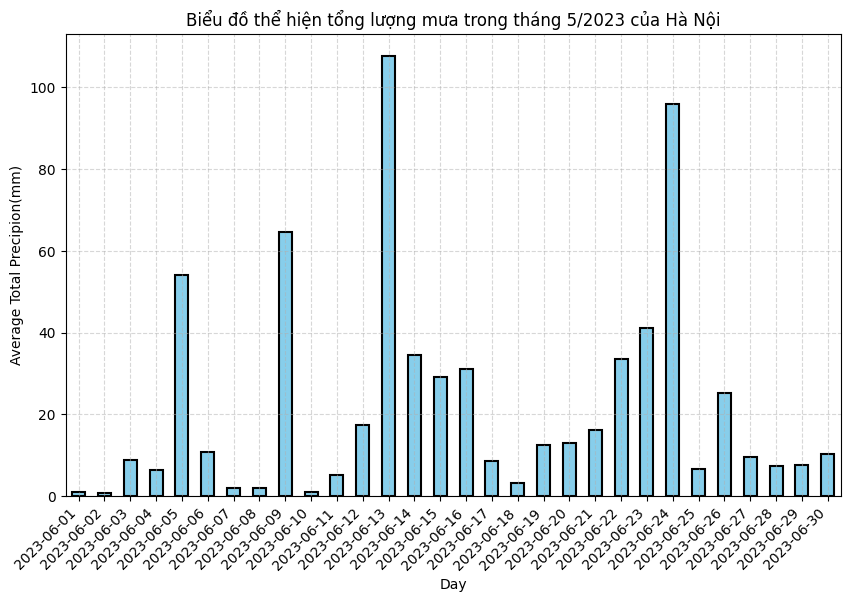

In [37]:
JuneSL_df["Day"] = pd.to_datetime(JuneSL_df["Day"])

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
JuneSL_df.groupby('Day')['TotalPrecip_mm'].mean().plot.bar(color='skyblue', edgecolor='black', linewidth=1.5)
plt.xlabel('Day')
plt.ylabel('Average Total Precipion(mm)')
plt.title('Biểu đồ thể hiện tổng lượng mưa trong tháng 5/2023 của Hà Nội')
plt.grid(True, linestyle='--', alpha=0.5)
xticks_loc = np.arange(len(JuneSL_df.index))
xticks_label = JuneSL_df["Day"].dt.strftime("%Y-%m-%d")
plt.xticks(xticks_loc, xticks_label, rotation=45, ha='right')
plt.show()

+ ta thấy là thấy lượng mưa của tháng 5 là một trong nhưng lượng mưa khá ít trong năm có ta xét trên từng ngày của tháng thì lượng mưa cao nhất trong ngày chỉ đạt hơn 70mm còn lại đa phần không mưa
=> kết luận: tháng 5 vừa qua nắng nóng, khô hạn kéo dài + mưa ít khiến cho nguồn điện từ các nhà máy thủy điện tạo ra khá là ít, khiến cho nhà máy thủy điện Sơn không thể cung cấp điện tốt cho các vùng là trong khoảng thời gian này bị cắt điện gián đoạn

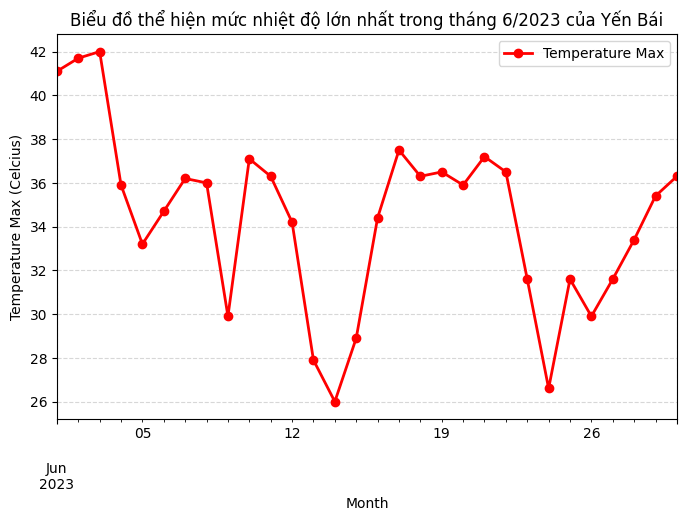

In [38]:
plt.figure(figsize=(8, 5))
JuneSL_df.groupby('Day')['Temperature Max'].mean().plot(color='red', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Temperature Max (Celcius)')
plt.title('Biểu đồ thể hiện mức nhiệt độ lớn nhất trong tháng 6/2023 của Yến Bái')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()